# 데이터 불러오기
- 국가별 음주데이터 분석

In [1]:
import pandas as pd
import numpy as np

In [2]:
drinks = pd.read_csv("./analysis/data/drinks.csv")

In [3]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [4]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [5]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


### 피처

- country : 국가 정보
- beer_servings : beer 소비량
- spirit_servings : spirit 소비량
- wine_servings : wine 소비량
- total_litres_of_pure_alcohol : 총 알코올 소비량
- continent : 국가의 대륙 정보

# 데이터 속성 탐색

### beer_servings, wine_servings의 두 피처간의 상관 관계보기


#### 단순상관분석

In [6]:
corr = drinks[["beer_servings", "wine_servings"]].corr(method = "pearson")

In [7]:
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


- 두 피처간의 상관계수는 0.52

#### 다중상관분석

In [8]:
cols = drinks.columns[1:5]

In [9]:
corr = drinks[cols].corr()

In [10]:
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


- 이를 좀 더 쉽게 보기 위해 heatmap과 pairplot으로 확인하자

#### heatmap

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

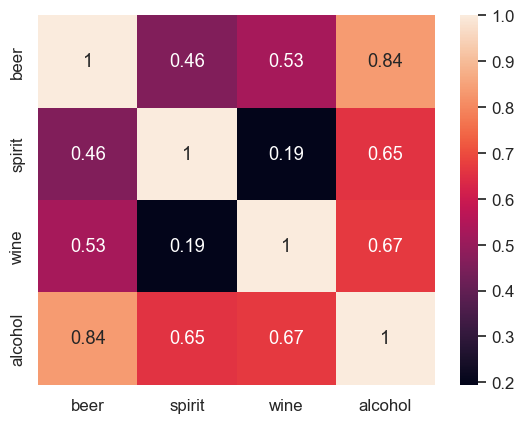

In [12]:
cols_view = ["beer", "spirit", "wine", "alcohol"]
sns.set(font_scale = 1.1)
sns.heatmap(corr.values,
            annot = True,
            yticklabels = cols_view,
            xticklabels = cols_view)

plt.show()

#### pairplot

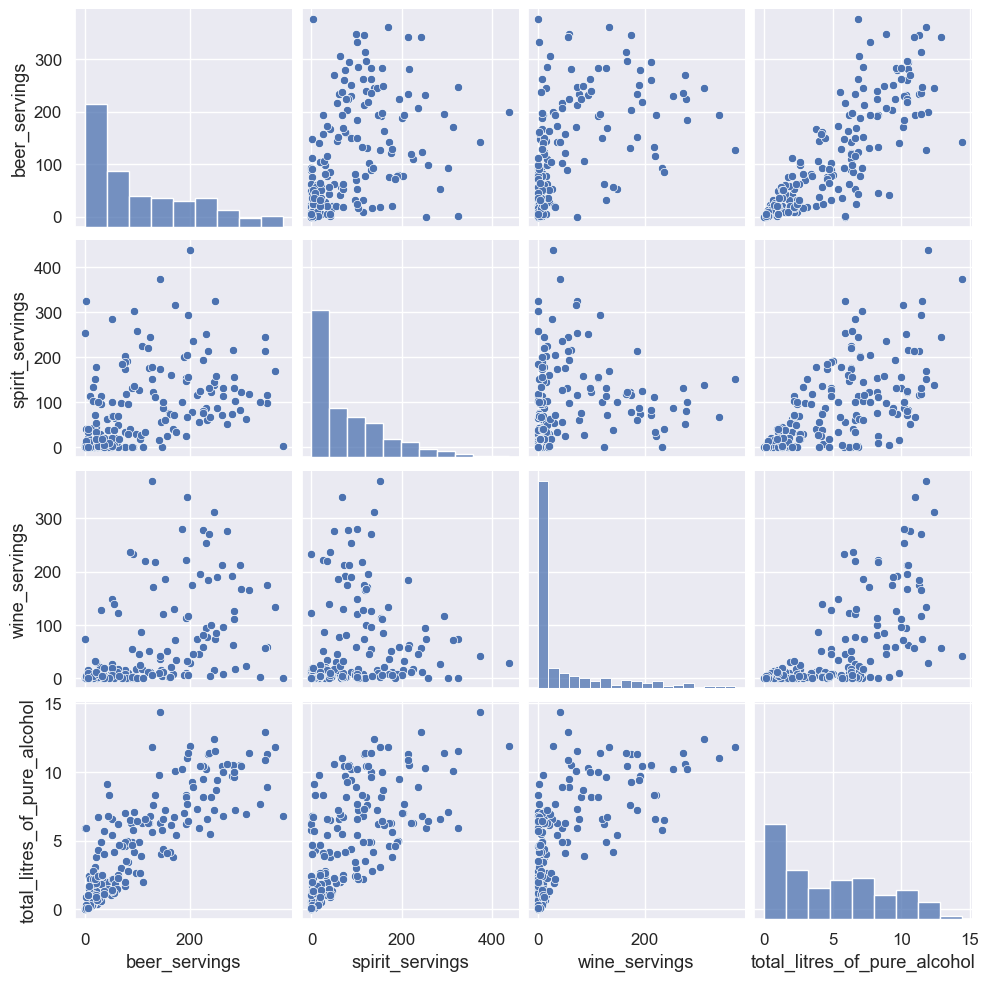

In [13]:
sns.pairplot(drinks[cols])
plt.show()

- total_litres_of_pure_alcohol 피처가 대체적으로 다른 모든 피처와 강한 상관관계가 있는 것으로 보임
- 특히 beer_servings와의 상관성이 가장 높음

# 데이터 전처리

In [14]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


- continent 피처에 결측치 확인
    - 기타 대륙인 "OT"로 처리

In [15]:
drinks["continent"] = drinks["continent"].fillna("OT")

In [16]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [17]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


# 데이터 탐색

### 파이차트
- 전체 대륙 중 OT가 차지하는 비율 확인

In [18]:
labels = drinks["continent"].value_counts().index

In [19]:
value = drinks["continent"].value_counts().values

In [20]:
labels

Index(['AF', 'EU', 'AS', 'OT', 'OC', 'SA'], dtype='object')

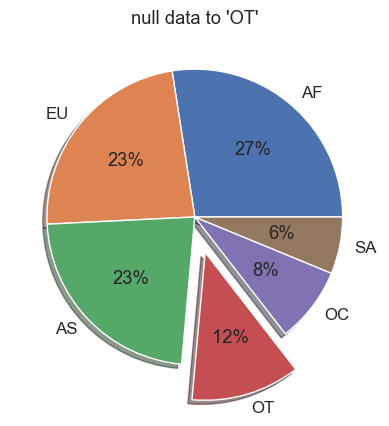

In [21]:
explode = (0, 0, 0, 0.25, 0, 0)
plt.pie(value, labels = labels, explode = explode, autopct = "%.0f%%", shadow = True)

plt.title("null data to \'OT\'")
plt.show()

### 대륙별 spirit_servings의 통계적 정보

In [22]:
drinks.groupby("continent")["spirit_servings"].agg(["mean", "min", "max", "sum"])

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [23]:
result = drinks.groupby("continent")["spirit_servings"].agg(["mean", "min", "max", "sum"])

#### 시각화

In [24]:
n_groups = len(result)

In [25]:
idx = np.arange(n_groups)

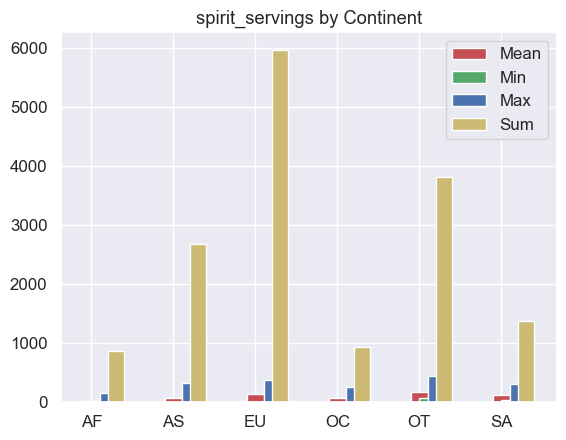

In [44]:
result1 = plt.bar(idx, result["mean"], color = "r", width = 0.2, label = "Mean")
result2 = plt.bar(idx + 0.1, result["min"], color = "g", width = 0.2, label = "Min")
result3 = plt.bar(idx + 0.2, result["max"], color = "b", width = 0.2, label = "Max")
result4 = plt.bar(idx + 0.3, result["sum"], color = "y", width = 0.2, label = "Sum")

plt.title("spirit_servings by Continent")
plt.xticks(idx, result.index)
plt.legend()
plt.show()

### 전체 평균보다 더 많은 알코올을 섭취하는 대륙

In [27]:
total_mean = drinks["total_litres_of_pure_alcohol"].mean()

In [28]:
continent_mean = drinks.groupby("continent")["total_litres_of_pure_alcohol"].mean()

In [29]:
continent_mean[continent_mean > total_mean]

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

- 대륙별 평균이 전세계 평균보다 큰 경우 -> 3개의 대륙이 나온다.

#### 시각화

In [30]:
continents = continent_mean.index.tolist()

In [31]:
continents.append("mean")

In [32]:
alcohol = continent_mean.tolist()

In [33]:
alcohol.append(total_mean)

In [34]:
x_pos = np.arange(len(continents))

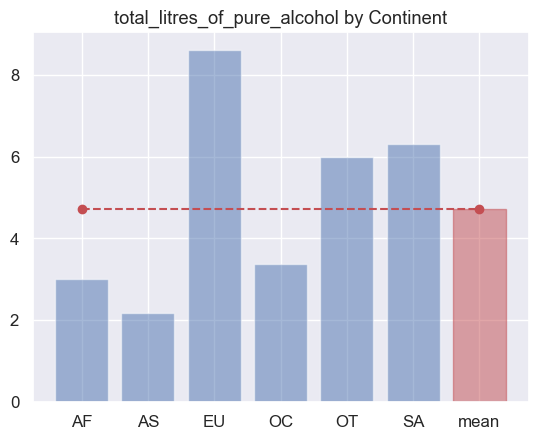

In [35]:
bar_list = plt.bar(x_pos, alcohol, alpha = 0.5)
bar_list[-1].set_color("r")

plt.plot([0.,6], [total_mean, total_mean], "or--")
plt.title("total_litres_of_pure_alcohol by Continent")
plt.xticks(x_pos, continents)
plt.show()

### 평균 beer_servings가 가장 높은 대륙

In [36]:
# 제일 높은 대륙 = EU
drinks.groupby("continent")["beer_servings"].mean().idxmax()

'EU'

In [37]:
beer_mean = drinks.groupby("continent")["beer_servings"].mean()

In [38]:
beer_continent = beer_mean.index.tolist()

In [39]:
alcohol = beer_mean.values.tolist()

In [40]:
x_pos = np.arange(len(beer_mean))

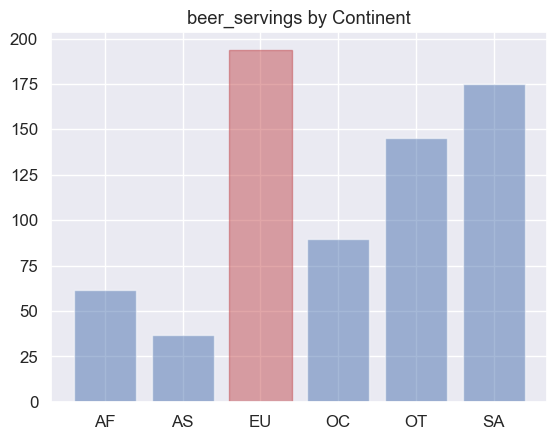

In [43]:
bar_list = plt.bar(x_pos, alcohol, alpha = 0.5)
bar_list[beer_continent.index("EU")].set_color("r")

plt.title("beer_servings by Continent")
plt.xticks(x_pos, beer_continent)
plt.show()

# 통계분석

- 지금까지의 분석은 통찰을 발견하는 데 있어서는 유용했지만 분석가의 주관에 따라 분석된 내용이기 때문에 타당성을 입증하기 어려움
- 타당성을 위해서는 통계적으로 검정하는 과정이 필요

- t검정
    - 두 집단 간 평균의 차이에 대한 검정
    - 모집단의 평균을 모를 때 현재의 데이터만으로 두 집단의 차이에 대해 검정할 수 있음
    - 단, 두 집단의 데이터 개수가 비슷하고, 정규 분포인 경우에 신뢰도가 높음
    

### 아프리카와 유럽 간의 맥주 소비량 차이를 검정

In [45]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [47]:
af = drinks[drinks["continent"] == "AF"]
eu = drinks[drinks["continent"] == "EU"]

In [50]:
from scipy import stats

tTestResult = stats.ttest_ind(af["beer_servings"], eu["beer_servings"])
tTestResultDiffVar = stats.ttest_ind(af["beer_servings"], eu["beer_servings"], equal_var = False)

In [51]:
print(tTestResult)
print(tTestResultDiffVar)

Ttest_indResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11)
Ttest_indResult(statistic=-7.143520192189803, pvalue=2.9837787864303205e-10)


- t-statistics(t-test의 검정 통계량)
    - 귀무가설과의 차이를 뜻함
        - 양쪽 집단의 평균에는 차이가 없다로 가정
    - 그 자체로는 아무 의미 없으며 p-value와 함께 해석해야함.
    
- p-value(유의확률)
    - 가설이 얼마나 믿을만한 것인지 나타내는 지표
    - 데이터를 새로 샘플링 했을 때 귀무 가설이 맞다는 전제 하에 현재 나온 통계값 이상이 나올 확률
        - 즉, p-value가 낮으면 귀무 가설이 일어날 확률이 너무 낮기 때문에 귀무 가설을 기각하게 됨.
            - 보통 그 기준은 0.05나 0.01을 기준으로 함 
    
- 귀무가설
    - 처음부터 바랄 것을 예상하는 가설
    - 가설이 맞지 않다는 것을 증명하기 위해 수립하는 가설
    - 반대되는 가설을 대립 가설이라고 부르며, 귀무 가설이 거짓인 경우에 대안으로 참이 되는 가설임.
    

#### 분석 내용

- t-test의 귀무 가설 : '두 집단의 평균이 같다'
    
- p-value가 0.01 이하로 나타나 귀무 가설이 기각되었음.

- 따라서 '아프리카와 유럽 대륙간의 맥주 소비량 차이'는 통계적으로 유의미하다.
    - 두 집단의 평균은 다르다.